In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [17]:
os.getcwd()
os.listdir()

['full_wires',
 'kycoils.txt',
 'st_field_feilicity.ipynb',
 'st_field_using_biot_savart.ipynb']

In [18]:
# determine the length of the coil -> coil1 is the shortest coil 
data = np.loadtxt('full_wires/mirror_coil1/mir_wire7.txt')
print(np.max(data[:,0]),np.min(data[:,0]))

-0.65025 -0.75


In [19]:
# check the number of wire winding

def count_wires(dir_path):
    count =0
    for path in os.listdir(dir_path):
        if os.path.isfile(os.path.join(dir_path,path)):
            count +=1
    return print(f'Number of wire files = {count}')

In [20]:
# coil A
dir_path = 'full_wires/mirror_coil1'
count_wires(dir_path)

Number of wire files = 108


In [21]:
# coil B 
dir_path = 'full_wires/mirror_coil2'
count_wires(dir_path)

Number of wire files = 108


In [22]:
# coil c 
dir_path = 'full_wires/mirror_coil3'
count_wires(dir_path)

Number of wire files = 100


In [23]:
# coil D 
dir_path = 'full_wires/mirror_coil4'
count_wires(dir_path)

Number of wire files = 94


In [24]:
# all the seperated folders has 4 times higher wire density 

In [25]:
x = np.linspace(-0.75,0,100)        # lenth of all 4 coils is 0.75 m 
y = np.zeros_like(x)
z = np.zeros_like(x)
x_axis = np.stack([x,y,z],axis=1)   # this is the axis along which field is evaluated 

# function to find the field of one wire along the axis of coil 
def field_of_one_wire(data):
    r_vec = np.expand_dims(data,axis=0) - np.expand_dims(x_axis,axis=1) 
    dl_vc = np.expand_dims(np.diff(data,axis=0),axis=0)
    r_mag = np.expand_dims(np.linalg.norm(r_vec[:,:-1,:],axis=-1),axis=-1)
    db = np.cross(dl_vc,r_vec[:,:-1,:])/r_mag**3
    B = np.sum(db,axis=1)
    return B*1e-7
      
field_of_one_wire(data).shape 

(100, 3)

In [26]:
# let's find magnetic field due to many wires 

# all the files for one coil 
dir_path_coil_1 = 'full_wires/mirror_coil1'
dir_path_coil_2 = 'full_wires/mirror_coil2'
dir_path_coil_3 = 'full_wires/mirror_coil3'
dir_path_coil_4 = 'full_wires/mirror_coil4'


In [27]:
# fucntion to get the toal magnetic field due to one coil section  

def B_tot_coil_section(dir_path,current):
    data_files = [os.path.join(dir_path,path) for path in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path,path))]
    num_of_wires = len(data_files)
    B = np.zeros((num_of_wires,100,3))
    for i in range(num_of_wires):
        data = np.loadtxt(data_files[i])
        B[i] = field_of_one_wire(data)*current

    B_tot = np.sum(B,axis=0)
    return B_tot.T

In [28]:
Bx_1, By_1,Bz_1 = B_tot_coil_section(dir_path_coil_1,0.1196)
Bx_2, By_2,Bz_2 = B_tot_coil_section(dir_path_coil_2,0.1474)
Bx_3, By_3,Bz_3 = B_tot_coil_section(dir_path_coil_3,0.2572)
Bx_4, By_4,Bz_4 = B_tot_coil_section(dir_path_coil_4,1.0)

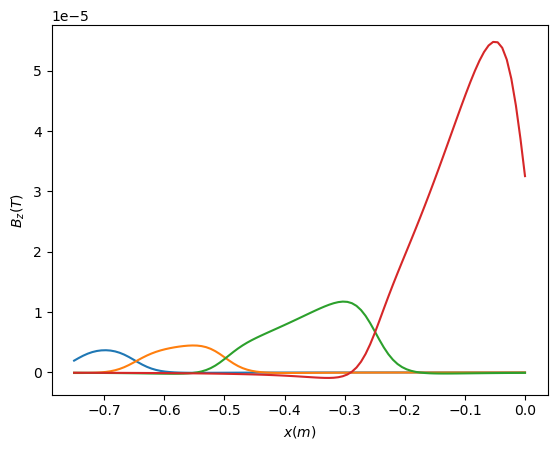

In [29]:
plt.plot(x,-Bz_1)
plt.plot(x,-Bz_2)
plt.plot(x,-Bz_3)
plt.plot(x,-Bz_4)

plt.xlabel('$x(m)$')
plt.ylabel('$B_z(T)$')
plt.show()

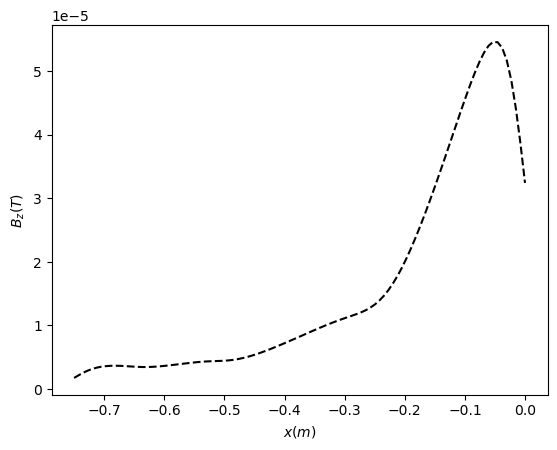

In [30]:
plt.plot(x,-(Bz_4 +Bz_3 + Bz_2 + Bz_1), 'k--')

plt.xlabel('$x(m)$')
plt.ylabel('$B_z(T)$')
plt.show()